## Pair Programming Métricas

En el ejercicio de pair programming anterior ajustastéis vuestro primer modelito de regresión logística. Ahora es el momento de saber como de bueno es nuestro modelo. Para esto, los objetivos del pair de hoy son:

- Calculad las métricas para vuestro modelo

- Interpretad las métricas obtenidas, ¿es un buen modelo? ¿hay overfitting o underfitting?

Happy coding 📊📈📉


In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score , cohen_kappa_score, roc_curve,roc_auc_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("../regresion_logistica/ficheros/loan_balanceado.csv", index_col = 0)
df.head()

,credit_history,applicantincome,coapplicantincome,loanamount,education_encoding,plazo_encoding,self_emp_encoding,dependents_encod,gender_Female,gender_Male,married_No,married_Yes,property_area_Rural,property_area_Semiurban,property_area_Urban,loan_status
0,1,0.311983,-0.613757,-0.181121,2,3,2,3,0,1,1,0,0,0,1,1
1,1,-0.079844,-0.025836,-0.181121,2,3,2,2,0,1,0,1,1,0,0,0
2,1,-0.569782,-0.613757,-1.021461,2,3,1,3,0,1,0,1,0,0,1,1
3,1,-0.698843,0.305552,-0.289552,1,3,2,3,0,1,0,1,0,0,1,1
4,1,0.358718,-0.613757,-0.004921,2,3,2,3,0,1,1,0,0,0,1,1


In [4]:
X1 = df.drop("loan_status", axis = 1)
y1 = df["loan_status"]

In [5]:
X1

,credit_history,applicantincome,coapplicantincome,loanamount,education_encoding,plazo_encoding,self_emp_encoding,dependents_encod,gender_Female,gender_Male,married_No,married_Yes,property_area_Rural,property_area_Semiurban,property_area_Urban
0,1,0.311983,-0.613757,-0.181121,2,3,2,3,0,1,1,0,0,0,1
1,1,-0.079844,-0.025836,-0.181121,2,3,2,2,0,1,0,1,1,0,0
2,1,-0.569782,-0.613757,-1.021461,2,3,1,3,0,1,0,1,0,0,1
3,1,-0.698843,0.305552,-0.289552,1,3,2,3,0,1,0,1,0,0,1
4,1,0.358718,-0.613757,-0.004921,2,3,2,3,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683,1,0.301460,0.815500,2.299234,2,3,2,3,0,1,1,0,1,0,0
684,0,-0.635705,0.133620,0.062848,2,3,2,2,0,1,0,1,1,0,0
685,1,3.046105,0.204966,2.204357,2,3,2,3,0,1,0,1,1,0,0
686,1,0.126593,-0.613757,-0.641953,2,3,2,1,0,1,0,1,0,0,1


In [6]:
y1

0      1
1      0
2      1
3      1
4      1
      ..
683    0
684    0
685    0
686    0
687    0
Name: loan_status, Length: 688, dtype: int64

In [7]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.2, random_state = 42)

Ajustamos la predicción del modelo

In [8]:
log_reg_esta = LogisticRegression(n_jobs=-1, max_iter = 1000)

log_reg_esta.fit(x_train1,y_train1)

y_pred_train_esta = log_reg_esta.predict(x_train1)

y_pred_test_esta = log_reg_esta.predict(x_test1)

Matriz de confusión

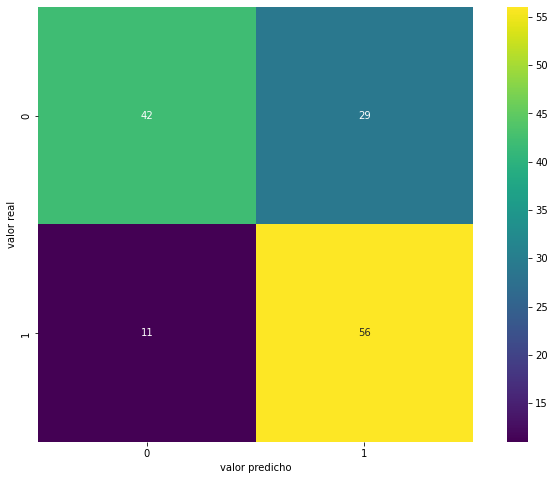

In [9]:
mat_lr_esta = confusion_matrix(y_test1, y_pred_test_esta)


plt.figure(figsize = (12, 8))
sns.heatmap(mat_lr_esta, square=True, annot=True, fmt="d", cmap = "viridis")


plt.xlabel('valor predicho')
plt.ylabel('valor real')
plt.show()

Sacamos las métricas

In [10]:
def metricas(clases_reales_test, clases_predichas_test, clases_reales_train, clases_predichas_train, modelo):
   
    # para el test
    accuracy_test = accuracy_score(clases_reales_test, clases_predichas_test)
    precision_test = precision_score(clases_reales_test, clases_predichas_test)
    recall_test = recall_score(clases_reales_test, clases_predichas_test)
    f1_test = f1_score(clases_reales_test, clases_predichas_test)
    kappa_test = cohen_kappa_score(clases_reales_test, clases_predichas_test)

    accuracy_train = accuracy_score(clases_reales_train, clases_predichas_train)
    precision_train = precision_score(clases_reales_train, clases_predichas_train)
    recall_train = recall_score(clases_reales_train, clases_predichas_train)
    f1_train = f1_score(clases_reales_train, clases_predichas_train)
    kappa_train = cohen_kappa_score(clases_reales_train, clases_predichas_train)
    

    
    df = pd.DataFrame({"accuracy": [accuracy_test, accuracy_train], 
                       "precision": [precision_test, precision_train],
                       "recall": [recall_test, recall_train], 
                       "f1": [f1_test, f1_train],
                       "kapppa": [kappa_test, kappa_train],
                       "set": ["test", "train"]})
    
    df["modelo"] = modelo
    return df


Llamamos a la función:

In [11]:
results_logistic_esta = metricas(y_test1, y_pred_test_esta, y_train1, y_pred_train_esta, "Regresión logistica Esta")
results_logistic_esta

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.710145,0.658824,0.835821,0.736842,0.424160,test,Regresión logistica Esta
1,0.732727,0.684659,0.870036,0.766296,0.464364,train,Regresión logistica Esta


Verdadero positivo: Previsión de conceder el préstamo y ser concedido.

Falso positivo: predicción de conceder el préstamo y no ser concedido.

Verdadero negativo: Previsión de no concesión del préstamo y no ser concedido.

Falso negativo: previsión de no concesión del préstamo y ser concedido. Este tipo de error sería el que más nos conviene en caso de no acertar.


Nuestro modelo muestra:
- 71% de accuracy (excatitud de predicción).
- 65% de precisión, predicciones positivas correctas (verdaderas y falsas)
- 83% de recall, de positivos capturados (VP y FN)
- La media entre la precisión y el recall (F1) es de 0.73
- La especifidad no nos interesa especialmente.(VN)
- Nuestro kappa (concordancia) es de 0.42, lo que quiere decir que es moderado.


Coclusión: A la vista de estos resultados, concluimos que este modelo  de predicción (con datos estandarizados y codificados) no es el que mejor predice para nuestro conjunto de datos. Veremos si con las herramientas de Decission Tree y Random Forest podemos mejorar las métricas.

Apreciamos un ligero índice de overfitting que probablemente se puede compensar con las herramientas mencionadas.

Guardamos este dataframe para comparar

In [12]:
results_logistic_esta.to_csv('metricas_estandarizadas.csv')